In [2]:
# import the necessary packages
import import_ipynb
import cv2, os
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing import image

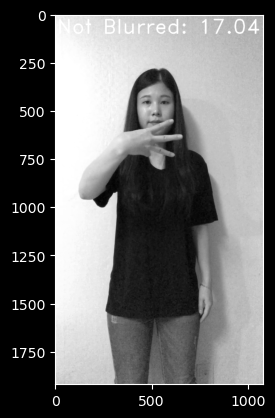

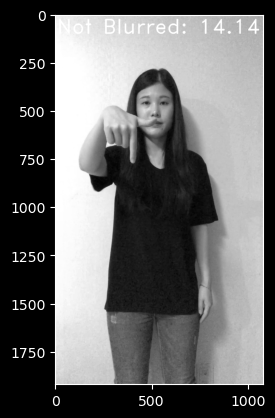

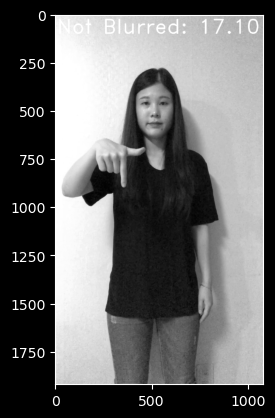

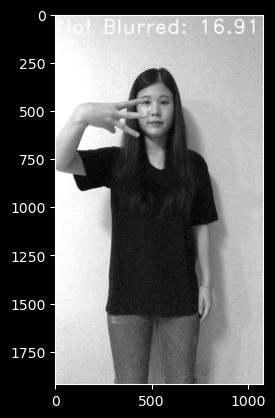

In [3]:
class ImageProcess:
	def __init__(self, dateset_dir):
		self.dataset_dir = dateset_dir	# modify required
		self.blur_threshold = 50
		
	# compute the Laplacian of the image and then return the focus measure, which is simply the variance of the Laplacian
	def variance_of_laplacian(self, image) -> float:
		return cv2.Laplacian(image, cv2.CV_64F).var()

	def removeBlurImage(self):
		img_name_list = [i for i in os.walk(self.dataset_dir)][0][2]
		img_path_list = [os.path.join(self.dataset_dir, img) for img in img_name_list]
		# loop over the input images
		for img in img_path_list:
			# load the image with grayscale, and compute the focus measure of the image using the Variance of Laplacian method
			image = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
			fm = self.variance_of_laplacian(image)
			# if the focus measure is less than the supplied threshold,
			# then the image should be considered "Shaken"
			if fm < self.blur_threshold:
				text = "Not Blurred"
				cv2.putText(img = image, text = "{}: {:.2f}".format(text, fm), org = (10, 100),
					fontFace = cv2.FONT_HERSHEY_DUPLEX, fontScale = 3.5, color = (255, 255, 255), thickness =4)
			else:
				text = "Blurred"
				cv2.putText(img = image, text = "{}: {:.2f}".format(text, fm), org = (10, 140),
					fontFace = cv2.FONT_HERSHEY_DUPLEX, fontScale = 4, color = (0, 255, 250), thickness =7)
				# delete the shaken images
				os.remove(img)
			# Show the image
			plt.imshow(image, 'gray')
			plt.show()

if __name__ == '__main__':
	imgprocess = ImageProcess('/Users/hsyoon/Downloads/img/')
	imgprocess.removeBlurImage()
